In [2]:
%matplotlib inline


# Dimensionality Reduction with Neighborhood Components Analysis

Sample usage of Neighborhood Components Analysis for dimensionality reduction.

This example compares different (linear) dimensionality reduction methods
applied on the Digits data set. The data set contains images of digits from
0 to 9 with approximately 180 samples of each class. Each image is of
dimension 8x8 = 64, and is reduced to a two-dimensional data point.

Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.

Neighborhood Components Analysis (NCA) tries to find a feature space such
that a stochastic nearest neighbor algorithm will give the best accuracy.
Like LDA, it is a supervised method.

One can see that NCA enforces a clustering of the data that is visually
meaningful despite the large reduction in dimension.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
# Load dataset
df_train=pd.read_csv('../csv/train_tfidf_features.csv');
df_test=pd.read_csv('../csv/test_tfidf_features.csv');
df_X=df_train.drop(['id','label'], axis=1);
df_y=df_train['label'];
X=df_X.to_numpy();
y=df_y.to_numpy();

# # Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

print(X_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 1 ... 1 0 1]
5000 8592


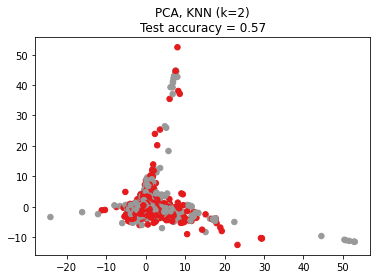

In [7]:
n_neighbors = 2
random_state = 0

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=4000, random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# plt.figure()
plt.figure()
# plt.subplot(1, 3, i + 1, aspect=1)

# Fit the method's model
pca.fit(X_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(pca.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(pca.transform(X_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
X_embedded = pca.transform(X)

# Plot the projected points and show the evaluation score
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
plt.title(
    "{}, KNN (k={})\nTest accuracy = {:.2f}".format('PCA', n_neighbors, acc_knn)
)
plt.show()
